<a href="https://colab.research.google.com/github/gajanankumar/Classification_Cardiovascular_Risk_Prediction/blob/classification/Cardiovascular_Risk_Prediction_Capstone_Project_GK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Project Title : Cardiovascular Risk Prediction**

**Project type** - Classification

**Contribution** - Individual

**Index:**
1. Problem statement
2. Importing the libraries and the dataset
3. Understand the data
4. Data cleaning
5. Handling missing data
6. Exploratory data analysis
7. Feature selection
8. Data preprocessing
9. ML model implementation
10. Results
11. Summary and conclusions
12. References

### **1. Problem Description**

**The main goal of the project is to predict the risk of Coronary Heart Disease (CHD) given a set of features. The prediction can be of 2 types, Yes or No.**

**In this project, we will be working on predicting 10 year risk of Coronary Heart Disease (CHD). We are given a set of variables which impact heart diseases. These variables are related to  demographic, past and current medical history.**

**Encourage people to get special check-ups to identify if they are at the risk of heart diseases. Heart diseases have unfortunately become very common. It may be due to various reasons such as lifestyle, work pressure, lack of exercise.**

### **Dataset Information**




**This data holds 3390 rows and 17 columns, which have been explained below.**


**Demographic:**

• Sex- male or female("M" or "F") 

• Age- Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 

**Behavioral: **

• is_smoking- whether or not the patient is a current smoker ("YES" or "NO") 

• Cigs Per Day- the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) 

**Medical( history)**

• BP Meds-whether or not the patient was on blood pressure medication (Nominal) 

• Prevalent Stroke- whether or not the patient had previously had a stroke (Nominal) 

• Prevalent Hyp-whether or not the patient was hypertensive (Nominal) 

• Diabetes- whether or not the patient had diabetes (Nominal) 

**Medical(current):**

• Tot Chol- total cholesterol level (Continuous) 

• Sys BP- systolic blood pressure (Continuous) 

• Dia BP- diastolic blood pressure (Continuous) 

• BMI- Body Mass Index (Continuous) 

• Heart Rate- heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose- glucose level (Continuous) 

**Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

###**2. Importing Libraries**

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



###**3. Importing Dataset**

In [ ]:
#mounting Goggle drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing dataset
df_chd=pd.read_csv('/content/drive/MyDrive/mlprojects/Cardiovascular_Risk_Prediction/data_cardiovascular_risk.csv')

### **4. Dataset Inspection**

In [ ]:
#getting first 5 records
df_chd.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#getting last 5 records
df_chd.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [ ]:
#getting available columns
df_chd.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#Getting Columnwise null valu counts and datatypes
df_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#getting Statistical information of dataset with numerical columns
df_chd.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#getting Statistical information of dataset with numerical and categorical columns
df_chd.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [ ]:
#checking null values
df_chd.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#checking null values
df_chd.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
#Checking Duplicate records in dataset
df_chd.duplicated().sum()

0

### **5. Data Cleaning**

In [ ]:
# Dropping the 'id' column
df_chd.drop('id', axis = 1, inplace = True)

In [ ]:
df_chd['education']

0       2.0
1       4.0
2       1.0
3       1.0
4       1.0
       ... 
3385    1.0
3386    1.0
3387    3.0
3388    1.0
3389    3.0
Name: education, Length: 3390, dtype: float64

In [ ]:
#checking value counts
df_chd['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
#checking unique values
df_chd['education'].unique()

array([ 2.,  4.,  1.,  3., nan])

In [ ]:
#getting list of numerical columns
num_feats=df_chd.describe()
num_feats=num_feats.columns.to_list()

In [ ]:
#list of numerical features
num_feats

['age',
 'education',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
#changing datatype of education column
df_chd['education']=df_chd['education'].astype('object')

In [ ]:
#checking datatype of changed column
df_chd['education'].dtype

dtype('O')

Here education feature found as categorical numerical datatype,so we can convert to object for eda puropse only.

In [ ]:
#checking value counts for each numerical columns
for x in num_feats:
  value_counts=df_chd[x].value_counts()
  print("{} value_counts:{}".format(x,value_counts))
  print("*"*100)
  

age value_counts:40    148
42    145
41    144
46    140
39    139
44    135
48    134
45    131
43    127
38    119
52    118
55    116
50    115
53    114
51    114
47    108
54    107
49    104
57     97
58     95
60     95
63     93
59     93
56     92
61     87
62     80
64     75
36     75
37     73
65     43
67     33
66     30
35     29
34     16
68     14
69      5
33      4
70      2
32      1
Name: age, dtype: int64
****************************************************************************************************
education value_counts:1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64
****************************************************************************************************
cigsPerDay value_counts:0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0    

From above observations, we conclude that here features BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes', are numerical categorical, so we convert them to Object datatype for eda purpose only

In [ ]:
# function for coverting numerical to object datatype
def num_to_obj(feat):
  print("Before conversion dtype of {}:{}".format(feat,df_chd[feat].dtype))
  df_chd[feat]=df_chd[feat].astype('object')
  print("After conversion dtype of {}:{}".format(feat,df_chd[feat].dtype))

In [ ]:
num_catv=['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']
num_catv

['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [ ]:
#callinf function
for f in num_catv:
  ob=num_to_obj(f)

Before conversion dtype of BPMeds:float64
After conversion dtype of BPMeds:object
Before conversion dtype of prevalentStroke:int64
After conversion dtype of prevalentStroke:object
Before conversion dtype of prevalentHyp:int64
After conversion dtype of prevalentHyp:object
Before conversion dtype of diabetes:int64
After conversion dtype of diabetes:object
Before conversion dtype of TenYearCHD:int64
After conversion dtype of TenYearCHD:object


In [ ]:
#getting numerical features remaining
num_feats=df_chd.describe()
num_feats=num_feats.columns.to_list()

In [ ]:
num_feats

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [ ]:
#getting categorical variables list
cat_feats=[feat for feat in  df_chd.columns if feat not in num_feats]
cat_feats

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

In [ ]:
#getting value counts and unique values
for x in cat_feats:
  value_counts=df_chd[x].value_counts()
  uniques=df_chd[x].unique()
  print("{} value_counts:{}".format(x,value_counts))
  print()
  print("{} Uniques:{}".format(x,uniques))
  print()

education value_counts:1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

education Uniques:[2.0 4.0 1.0 3.0 nan]

sex value_counts:F    1923
M    1467
Name: sex, dtype: int64

sex Uniques:['F' 'M']

is_smoking value_counts:NO     1703
YES    1687
Name: is_smoking, dtype: int64

is_smoking Uniques:['YES' 'NO']

BPMeds value_counts:0.0    3246
1.0     100
Name: BPMeds, dtype: int64

BPMeds Uniques:[0.0 nan 1.0]

prevalentStroke value_counts:0    3368
1      22
Name: prevalentStroke, dtype: int64

prevalentStroke Uniques:[0 1]

prevalentHyp value_counts:0    2321
1    1069
Name: prevalentHyp, dtype: int64

prevalentHyp Uniques:[0 1]

diabetes value_counts:0    3303
1      87
Name: diabetes, dtype: int64

diabetes Uniques:[0 1]

TenYearCHD value_counts:0    2879
1     511
Name: TenYearCHD, dtype: int64

TenYearCHD Uniques:[1 0]



###**6. Checking Missing value counts**

In [ ]:
#checking missing values in numerical features
for x in num_feats:
  value_counts=df_chd[x].isna().sum()
  print("{} nan values :{}".format(x,value_counts))
  print("*"*100)

age nan values :0
****************************************************************************************************
cigsPerDay nan values :22
****************************************************************************************************
totChol nan values :38
****************************************************************************************************
sysBP nan values :0
****************************************************************************************************
diaBP nan values :0
****************************************************************************************************
BMI nan values :14
****************************************************************************************************
heartRate nan values :1
****************************************************************************************************
glucose nan values :304
****************************************************************************************************


In [ ]:
#getting missing values in categorical features
for x in cat_feats:
  value_counts=df_chd[x].isna().sum()
  print("{} nan values :{}".format(x,value_counts))
  print("*"*100)

education nan values :87
****************************************************************************************************
sex nan values :0
****************************************************************************************************
is_smoking nan values :0
****************************************************************************************************
BPMeds nan values :44
****************************************************************************************************
prevalentStroke nan values :0
****************************************************************************************************
prevalentHyp nan values :0
****************************************************************************************************
diabetes nan values :0
****************************************************************************************************
TenYearCHD nan values :0
**************************************************************************************************

In [ ]:
# Missing Value Count Function
def show_missing():
    missing = df_chd.columns[df_chd.isnull().any()].tolist()
    print("missing:",missing)
    return missing #returns missing values column list

# Missing data counts and percentage
print('Missing Data Count')
print(df_chd[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(df_chd[show_missing()].isnull().sum().sort_values(ascending = False)/len(df_chd)*100,3))

Missing Data Count
missing: ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
missing: ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']
glucose       8.968
education     2.566
BPMeds        1.298
totChol       1.121
cigsPerDay    0.649
BMI           0.413
heartRate     0.029
dtype: float64


### **7. Univariate Analysis-Outlier Detection**

varage:int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


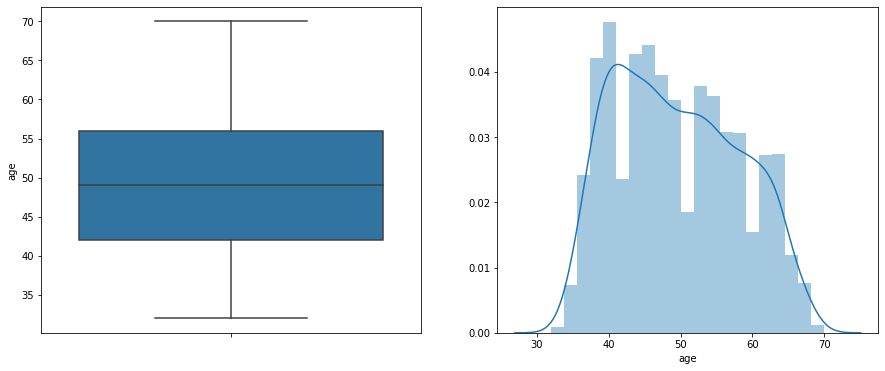

varcigsPerDay:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


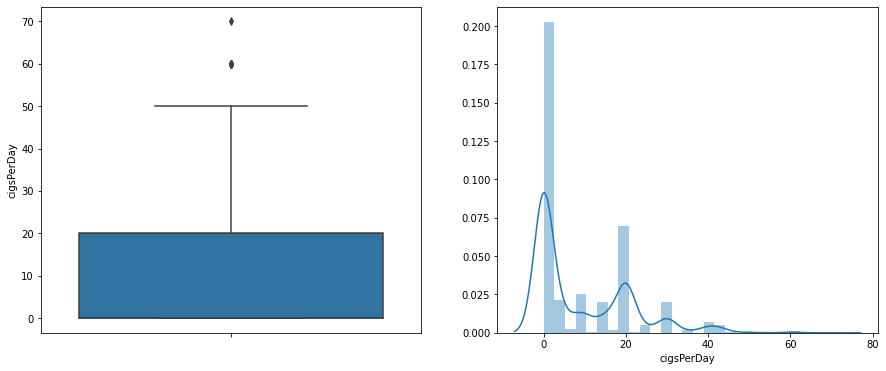

vartotChol:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


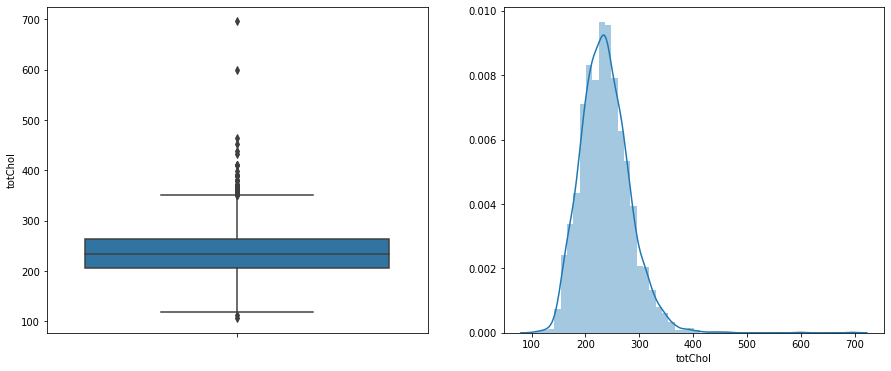

varsysBP:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


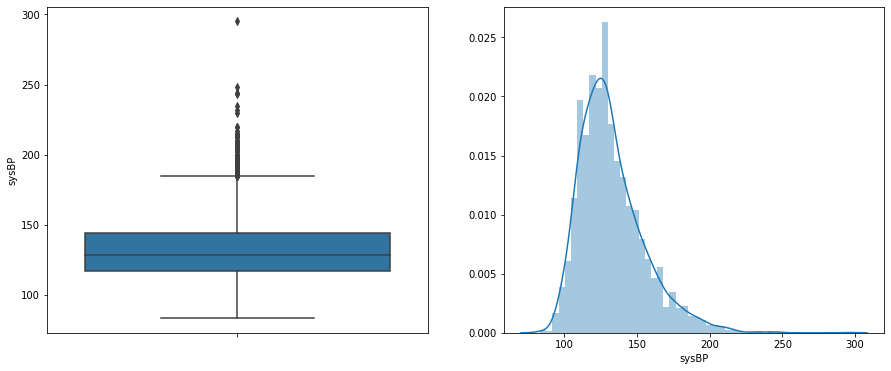

vardiaBP:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


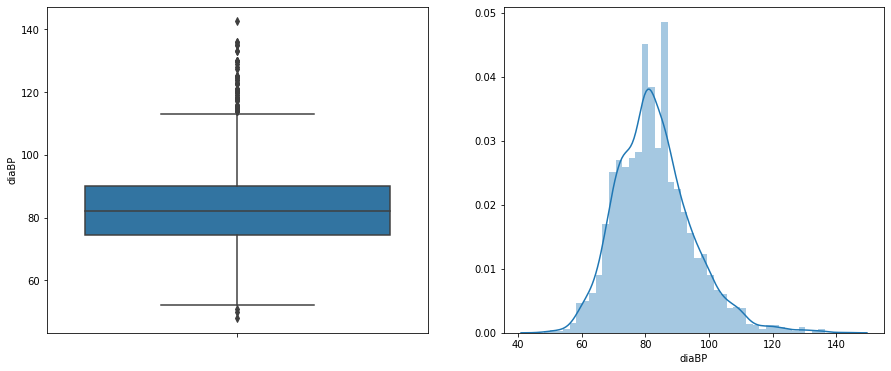

varBMI:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


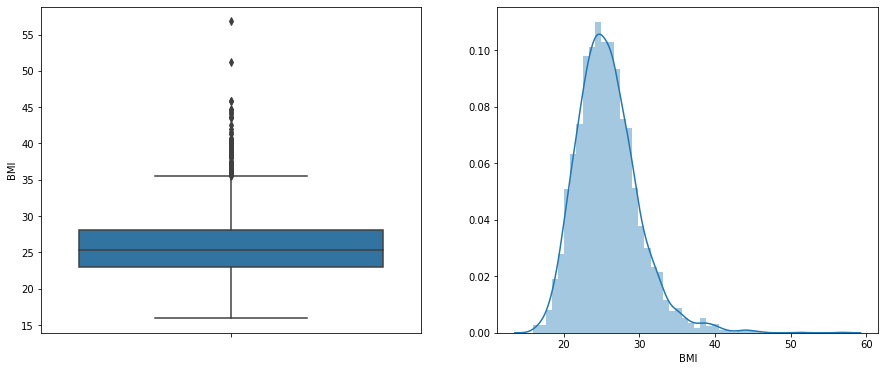

varheartRate:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


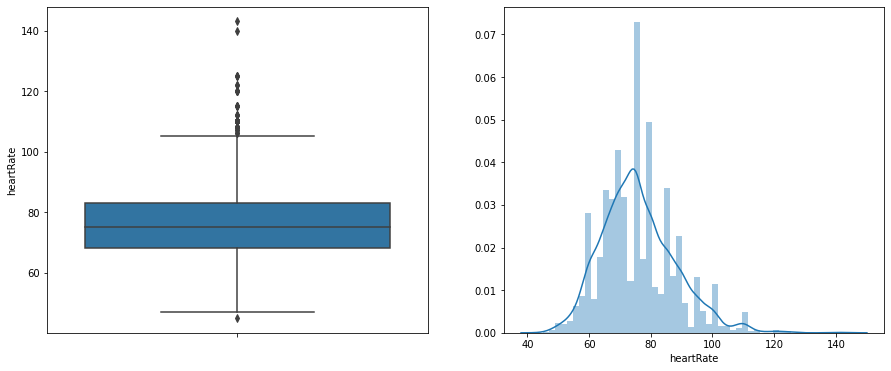

varglucose:float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


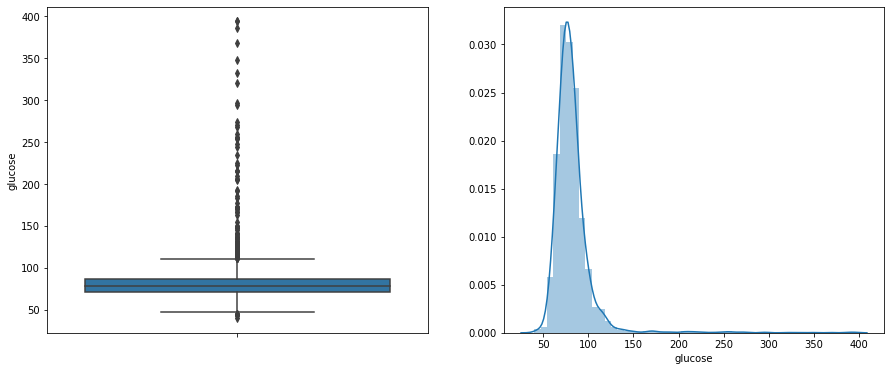

In [ ]:
#ploting bar plot and distributuin plot for numerical continuous features to check outliers
for var in num_feats:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    print("var{}:{}".format(var,df_chd[var].dtype))
    fig = sns.boxplot(y=df_chd[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_chd[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()

From above box plot and dist we conclude that outliers are present in variables
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose and most variables are right skewed.

### **8. Missing values handling**

As outliers are present in variables
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose and most variables are right skewed.
 we impute missing values with median for these feature.

In [ ]:
#missing value counts in continuous features
print('Features Missing Before'.format(x))
print(df_chd[num_feats[:]].isnull().sum())
print('--'*50)


Features Missing Before
age             0
cigsPerDay     22
totChol        38
sysBP           0
diaBP           0
BMI            14
heartRate       1
glucose       304
dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
# Creating a function to fill null values of continous columns with median
def median_fillna(df, columns):
  ''' Null values of continous columns are filled with the median of the column '''
  for column in columns:
    df[column] = df[column].fillna(df[column].median())

In [ ]:
# Applying the function to fill null values of continous columns with the median
median_fillna(df = df_chd, columns = ['cigsPerDay','totChol','BMI','heartRate','glucose'])

In [ ]:
#getting missing value count after replacement
print('Features Missing After'.format(x))
print(df_chd[num_feats[:]].isnull().sum())
print('--'*50)


Features Missing After
age           0
cigsPerDay    0
totChol       0
sysBP         0
diaBP         0
BMI           0
heartRate     0
glucose       0
dtype: int64
----------------------------------------------------------------------------------------------------


In [ ]:
df_chd.isna().sum()

age                 0
education          87
sex                 0
is_smoking          0
cigsPerDay          0
BPMeds             44
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             0
sysBP               0
diaBP               0
BMI                 0
heartRate           0
glucose             0
TenYearCHD          0
dtype: int64

In [ ]:
df_chd['BPMeds'].mode()[0]

0.0

In [ ]:
df_chd['education'].mode()[0]

1.0

**As 'education' and 'BPMeds' are categorical variables we will use mode to fill the null values**

In [ ]:
# Creating a function to fill null values of categorical columns with mode
def mode_fillna(df , columns):
  ''' Null values of categorical columns are filled with the mode of the column'''
  for column in columns:
    df[column] = df[column].fillna(df[column].mode()[0])

In [ ]:


print('Features Missing Before')
print(df_chd[['education','BPMeds']].isnull().sum())
print('--'*50)


# Confirm that the missing values in these columns are the same rows
print('Check Assumptions')
print(df_chd[(df_chd['education'].isnull())|
                 (df_chd['BPMeds'].isnull())]
                 [['education','BPMeds']])

print(df_chd[(df_chd['education'].isnull())|
                 (df_chd['BPMeds'].isnull())]
                 [['education','BPMeds']].shape)

# Impute MasVnrArea with the most frequent values

# Applying the function to fill null values of the column with mode
mode_fillna(df = df_chd, columns = ['education','BPMeds'])

print('Features Missing After')
print(df_chd[['education','BPMeds']].isnull().sum())
print('--'*50)

print('Confirm Imputation')
print(df_chd[(df_chd['education'].isnull())|
                 (df_chd['BPMeds'].isnull())]
                 [['education','BPMeds']])

Features Missing Before
education    87
BPMeds       44
dtype: int64
----------------------------------------------------------------------------------------------------
Check Assumptions
     education BPMeds
8          2.0    NaN
49         NaN    0.0
62         NaN    0.0
69         NaN    0.0
102        2.0    NaN
...        ...    ...
3252       NaN    0.0
3281       1.0    NaN
3322       NaN    0.0
3331       NaN    0.0
3388       1.0    NaN

[131 rows x 2 columns]
(131, 2)
Features Missing After
education    0
BPMeds       0
dtype: int64
----------------------------------------------------------------------------------------------------
Confirm Imputation
Empty DataFrame
Columns: [education, BPMeds]
Index: []


In [ ]:
df_chd.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
# No cigarettes smoked though the smoking column is yes
df_chd.loc[(df_chd['is_smoking'] == 'YES') & (df_chd['cigsPerDay'] == 0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,F,YES,0.0,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,M,YES,0.0,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,M,YES,0.0,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,78.0,0
491,61,1.0,F,YES,0.0,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,F,YES,0.0,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,M,YES,0.0,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,F,YES,0.0,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,F,YES,0.0,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,F,YES,0.0,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,F,YES,0.0,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


**As seen above there are entries where the 'is_smoking' column says 'YES' but there are no cigarettes smoked.**

In [ ]:
# Value counts before correction
df_chd['is_smoking'].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
# Correcting the 'is_smoking' column to 'NO' where there are no cigarettes smoked
df_chd.loc[(df_chd['is_smoking'] == 'YES') & (df_chd['cigsPerDay'] == 0), 'is_smoking'] = 'NO'

In [ ]:
# Values counts after correction
df_chd['is_smoking'].value_counts()

NO     1725
YES    1665
Name: is_smoking, dtype: int64

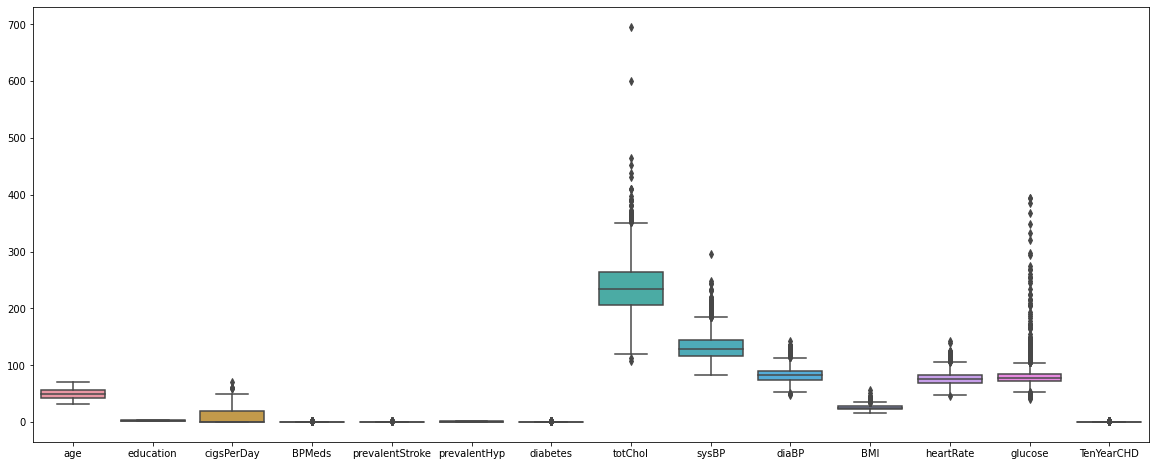

In [ ]:
# Boxplot for all columns
plt.figure(figsize=(20,8))
sns.boxplot(data=df_chd)

###**9. Handling Outliers**

In [ ]:
# Function which returns columns with risk of outlier removal
def outlier_cal(columns):
  ''' Returns a dataframe showing risk of removal of outliers'''
  outlier_df = pd.DataFrame(columns=['Column', 'Upper Limit', 'Lower Limit', 'Upper Removal', 'Lower Removal', '% of Risk'])
  
  for column in columns:
    q3 = df_chd[column].quantile(0.75)
    q1 = df_chd[column].quantile(0.25)
    iqr = q3 - q1
    ul = q3 + (1.5* iqr)
    ll = q1 - (1.5* iqr)
  
    upper_removal = dict(df_chd[df_chd[column] > ul]['TenYearCHD'].value_counts())
    lower_removal = dict(df_chd[df_chd[column] < ll]['TenYearCHD'].value_counts())

    input_dict = {'Column' : column,
                  'Upper Limit' : ul,
                  'Lower Limit' : ll,
                  'Upper Removal' : upper_removal,
                  'Lower Removal' : lower_removal,
                  '% of Risk' : upper_removal[1]*100/len(df_chd[df_chd[column] > ul])}

    outlier_df = outlier_df.append(input_dict, ignore_index = True)

  return outlier_df

In [ ]:
# Applying the function created
outlier_cal(['cigsPerDay','totChol','BMI','sysBP','diaBP','heartRate','glucose'])

,Column,Upper Limit,Lower Limit,Upper Removal,Lower Removal,% of Risk
0,cigsPerDay,50.00000,-30.00000,"{0: 7, 1: 2}",{},22.222222
1,totChol,351.00000,119.00000,"{0: 30, 1: 11}","{0: 1, 1: 1}",26.829268
2,BMI,35.44875,15.57875,"{0: 62, 1: 17}",{},21.518987
3,sysBP,184.50000,76.50000,"{0: 64, 1: 41}",{},39.047619
4,diaBP,113.25000,51.25000,"{0: 32, 1: 23}","{1: 2, 0: 1}",41.818182
5,heartRate,105.50000,45.50000,"{0: 50, 1: 13}",{0: 1},20.634921
6,glucose,104.50000,52.50000,"{0: 143, 1: 57}","{0: 13, 1: 1}",28.500000


**The above dataframe explains the effect of removal of outliers. If the outliers in this particular case are removed/replaced, it would cause removal/replacement of many rows with possible risk of CHD.** 

**In this scenario, it is known that people with extreme values of Cholestrol, BP, Glucose, BMI etc. are prone to heart diseases. Hence, removal of higher numbers is not considered.**

In [ ]:
#Capping the outlier rows with Percentiles
#for x in num_feats[2:]:
  #upper_lim = df_chd[x].quantile(.95)
  #lower_lim = df_chd[x].quantile(.05)
  #df_chd.loc[(df_chd[x] > upper_lim),x] = upper_lim
  #df_chd.loc[(df_chd[x] < lower_lim),x] = lower_lim

varage:int64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


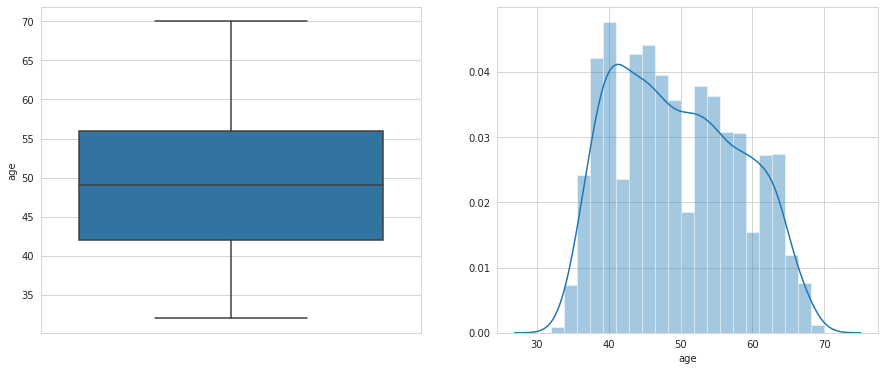

varcigsPerDay:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


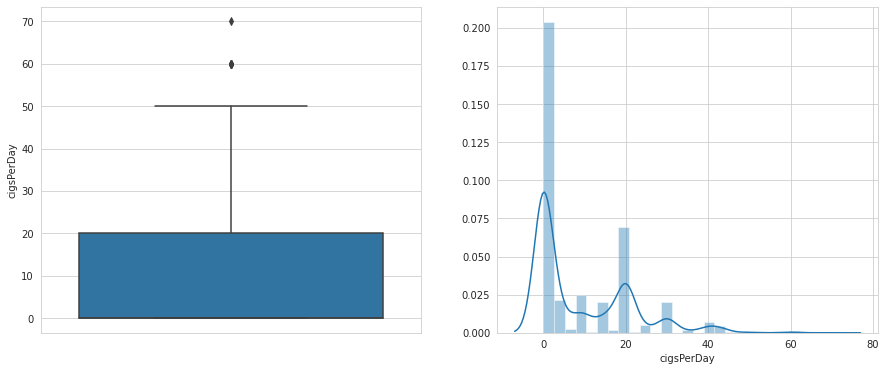

vartotChol:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


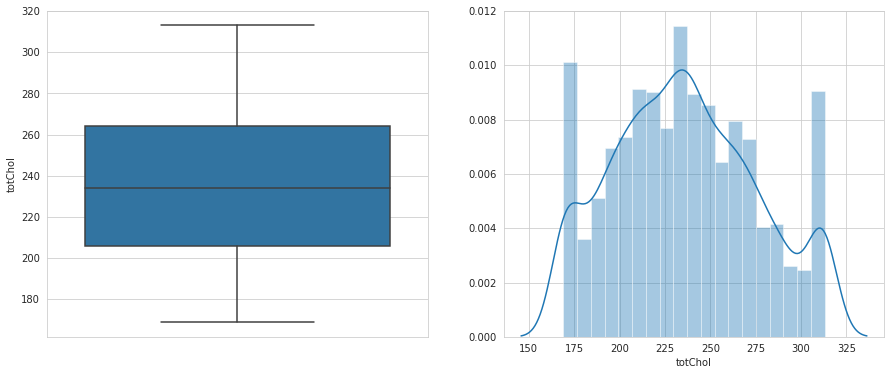

varsysBP:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


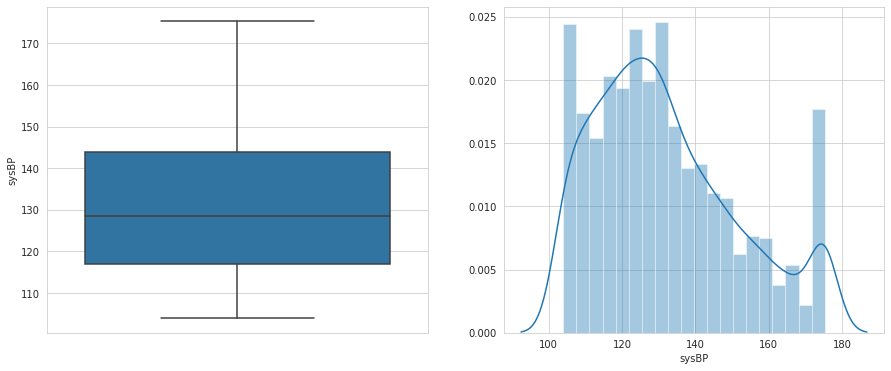

vardiaBP:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


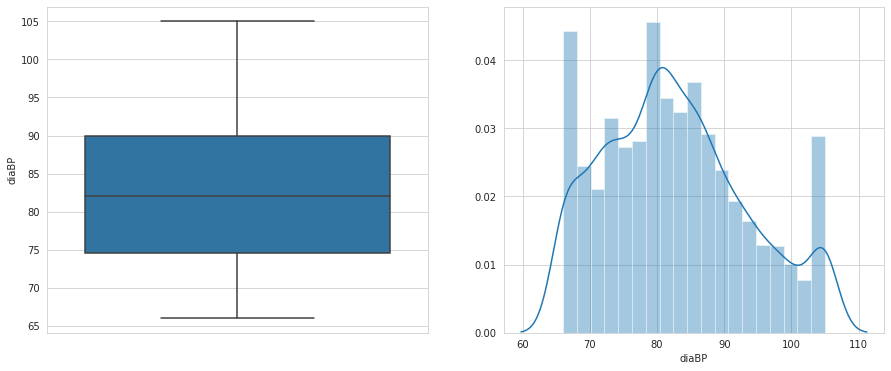

varBMI:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


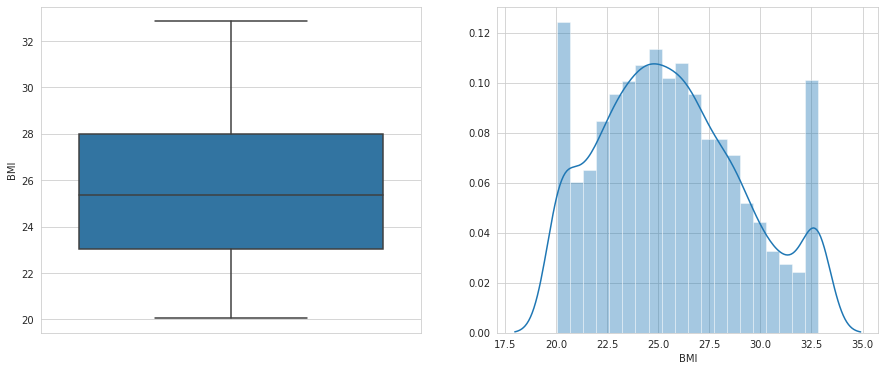

varheartRate:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


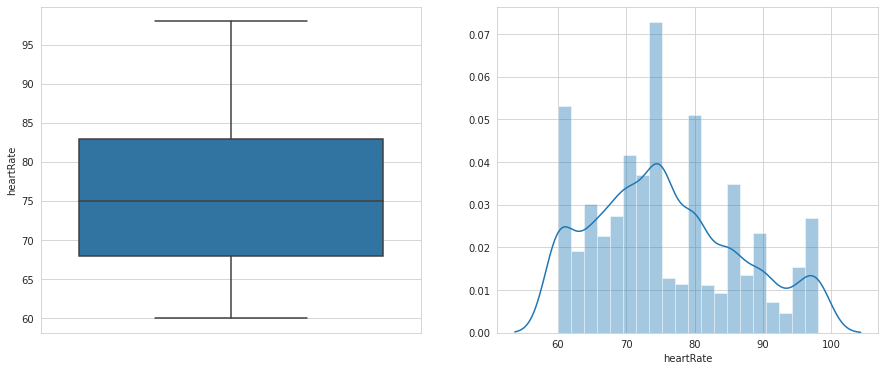

varglucose:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


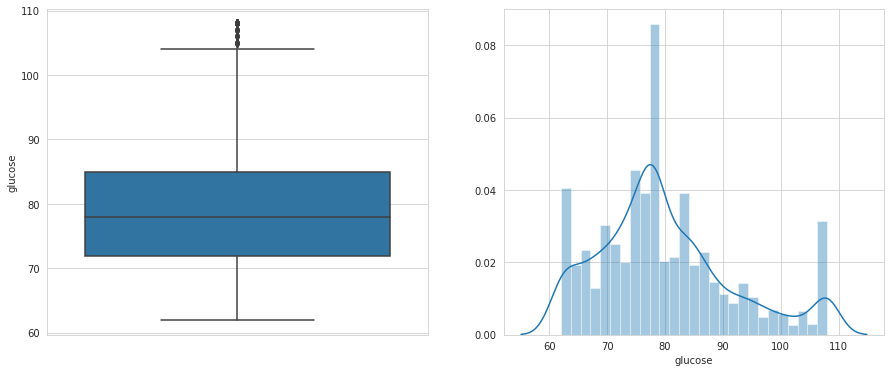

In [ ]:
#for var in num_feats:
    #plt.figure(figsize=(15,6))
    #plt.subplot(1, 2, 1)
    #print("var{}:{}".format(var,df_chd[var].dtype))
    #fig = sns.boxplot(y=df_chd[var])
    #fig.set_title('')
    #fig.set_ylabel(var)
    
    #plt.subplot(1, 2, 2)
    #fig = sns.distplot(df_chd[var].dropna())
    #fig.set_ylabel('')
    #fig.set_xlabel(var)

    #plt.show()

In [ ]:
"""
for x in num_feats[2:]:

  q3= df_chd[x].quantile(.75)
  q1 = df_chd[x].quantile(.25)
  iqr=q3-q1
  upp_lim=q3+1.5*iqr
  low_lim=q1-1.5*iqr

  df_chd.loc[(df_chd[x] > upp_lim),x] = upp_lim
  df_chd.loc[(df_chd[x] < low_lim),x] = low_lim
"""

varage:int64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


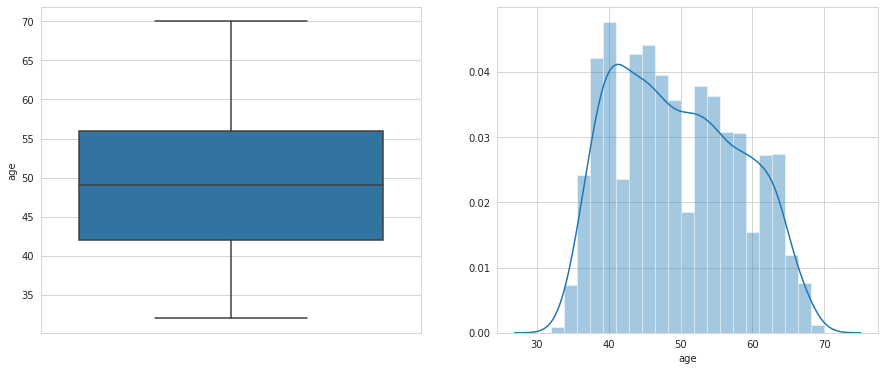

varcigsPerDay:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


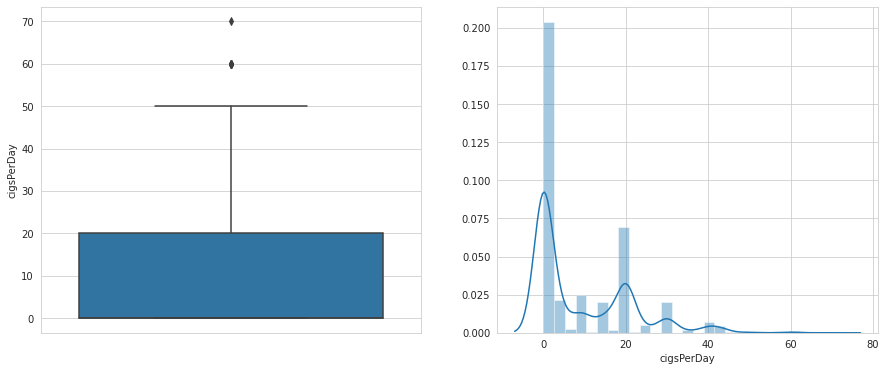

vartotChol:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


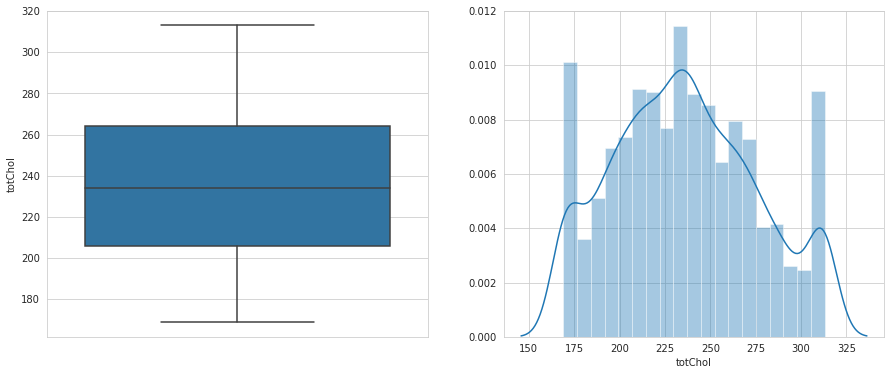

varsysBP:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


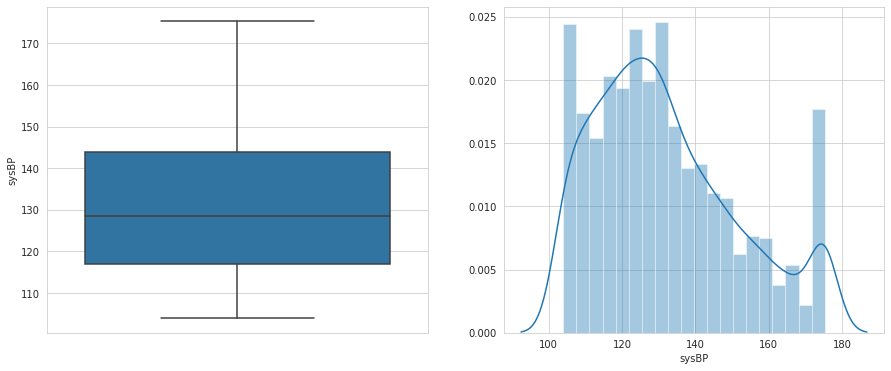

vardiaBP:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


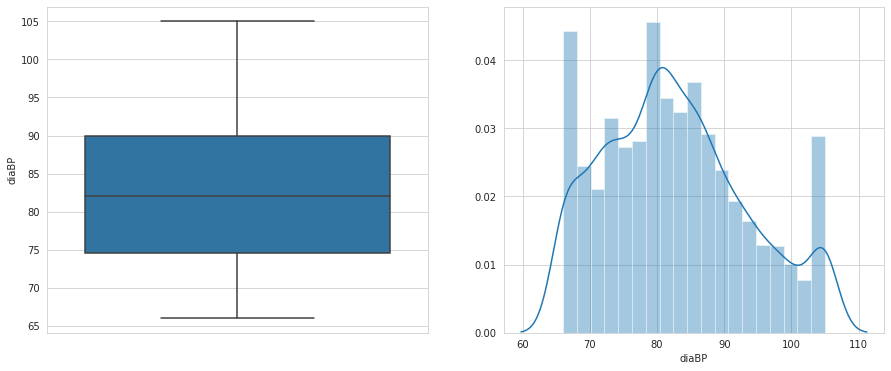

varBMI:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


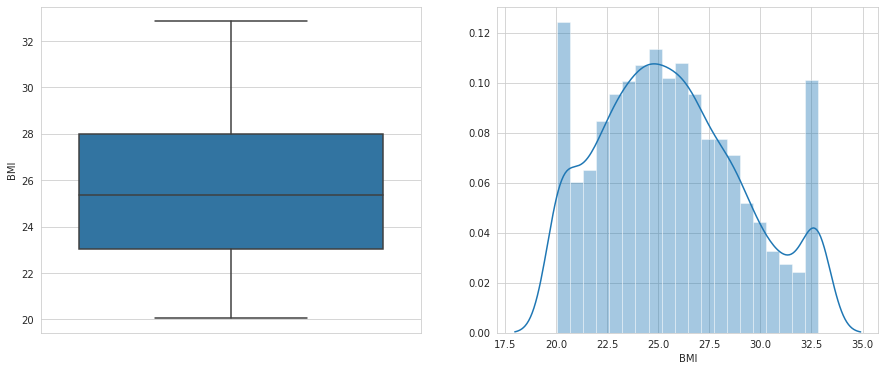

varheartRate:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


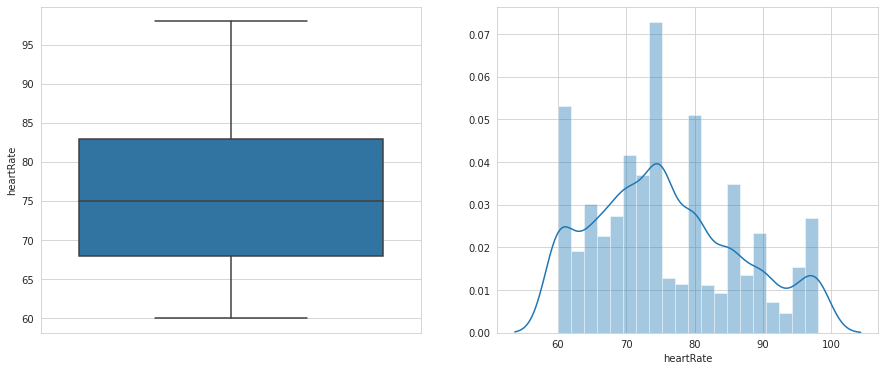

varglucose:float64


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


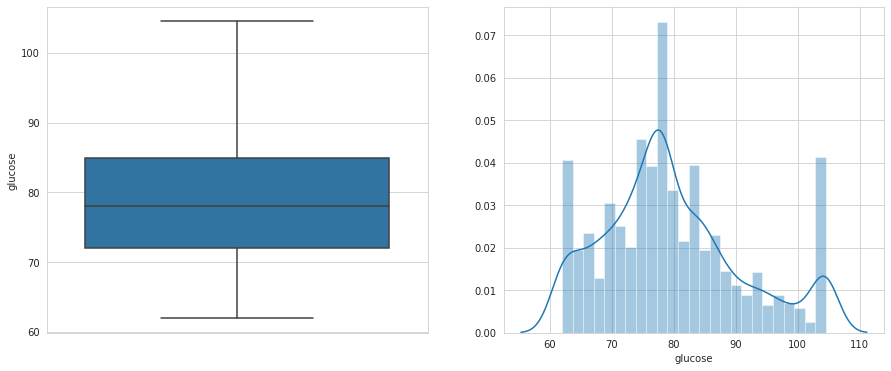

In [ ]:
"""
for var in num_feats:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    print("var{}:{}".format(var,df_chd[var].dtype))
    fig = sns.boxplot(y=df_chd[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df_chd[var].dropna())
    fig.set_ylabel('')
    fig.set_xlabel(var)

    plt.show()
    """

In [ ]:
discrete_feat=df_chd[cat_feats[3:]].astype("int").columns.to_list()
discrete_feat

['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

In [ ]:
# outlies in discrete variables
for var in discrete_feat:
    print(df_chd[var].value_counts() / np.float(len(df_chd)))
    print()

0.0    0.970501
1.0    0.029499
Name: BPMeds, dtype: float64

0    0.99351
1    0.00649
Name: prevalentStroke, dtype: float64

0    0.684661
1    0.315339
Name: prevalentHyp, dtype: float64

0    0.974336
1    0.025664
Name: diabetes, dtype: float64

0    0.849263
1    0.150737
Name: TenYearCHD, dtype: float64



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df_chd[cat_feats]

,education,sex,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,2.0,F,YES,0.0,0,0,0,1
1,4.0,M,NO,0.0,0,1,0,0
2,1.0,F,YES,0.0,0,0,0,0
3,1.0,M,YES,0.0,0,1,0,1
4,1.0,F,YES,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...
3385,1.0,F,NO,0.0,0,0,0,0
3386,1.0,F,NO,0.0,0,0,0,0
3387,3.0,M,YES,0.0,0,1,0,1
3388,1.0,M,NO,0.0,0,1,0,0


### **10. Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


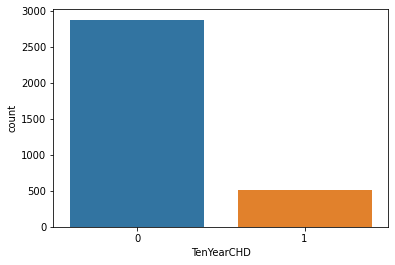

In [ ]:
# Distribution of our dependent variable
sns.countplot(df_chd['TenYearCHD'])

From above count plot we can conclude that there is class imbalance in dependenet variable as class 0 has more count than class1.
The dependent variable here is the 'TenYearCHD' column which states the risk of coronary heart disease in the next 10 years.
It is a binary variable, i.e it contains 0 and 1. 0 meaning no risk of heart disease and 1 meaning risk of heart disease.
 As our dependent variable is a discrete categorical variable this makes it a classification problem.

In [ ]:
# Creating a list for different column types
categorical_columns = ['sex','is_smoking','education','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']
numerical_columns = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']

In [ ]:
# Creating a function to plot countplots for categorical columns
def count_plotting(columns):
  ''' Returns subplots of countplot graphs using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(18,50))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.countplot(ax = axes[i], data = df_chd, x = column)

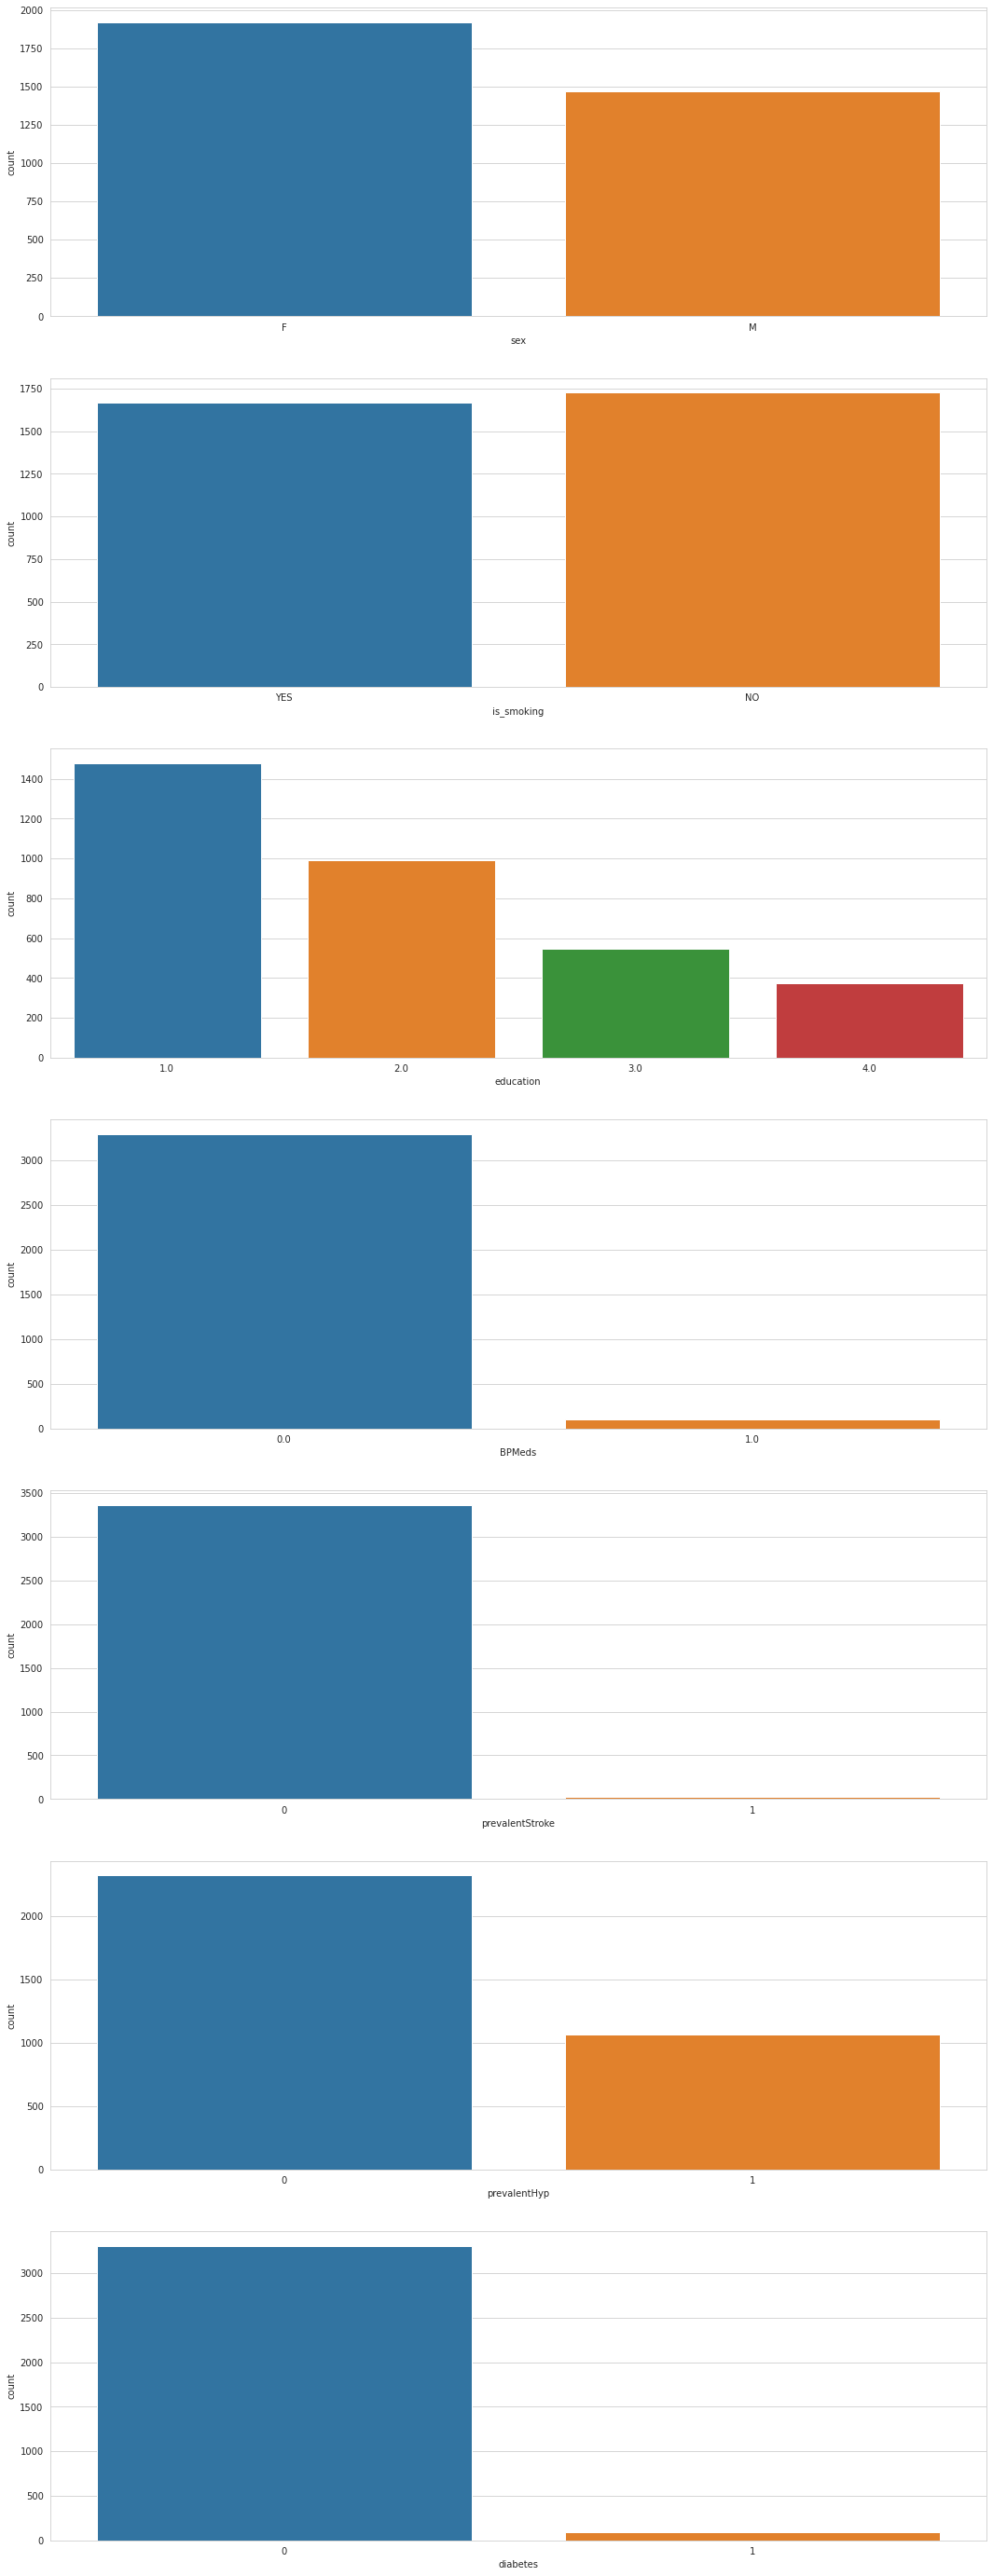

In [ ]:
# Creating countplots using above function
count_plotting(categorical_columns)

From above count plot we can conclude the following observations.

Females are more in proportion to men by a small margin.

There are more non-smokers than smokers by a small margin, both are around 1600 each.

Around 1500 people have an education level 1, and almost 400 people have an education level of 4. The levels are not defined.

More than 3000 people are not on BP medication

Only a small number of people have suffered a stroke previously.

Around 1000 people were hypertensive.

A large number (> 3000) of the people do not have diabetes.

In [ ]:
# Creating a function to plot distribution of numerical columns
def dist_plotting(columns):
  ''' Returns subplots of histograms using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(18,40))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.histplot(ax = axes[i], x = df_chd[column], kde = True)

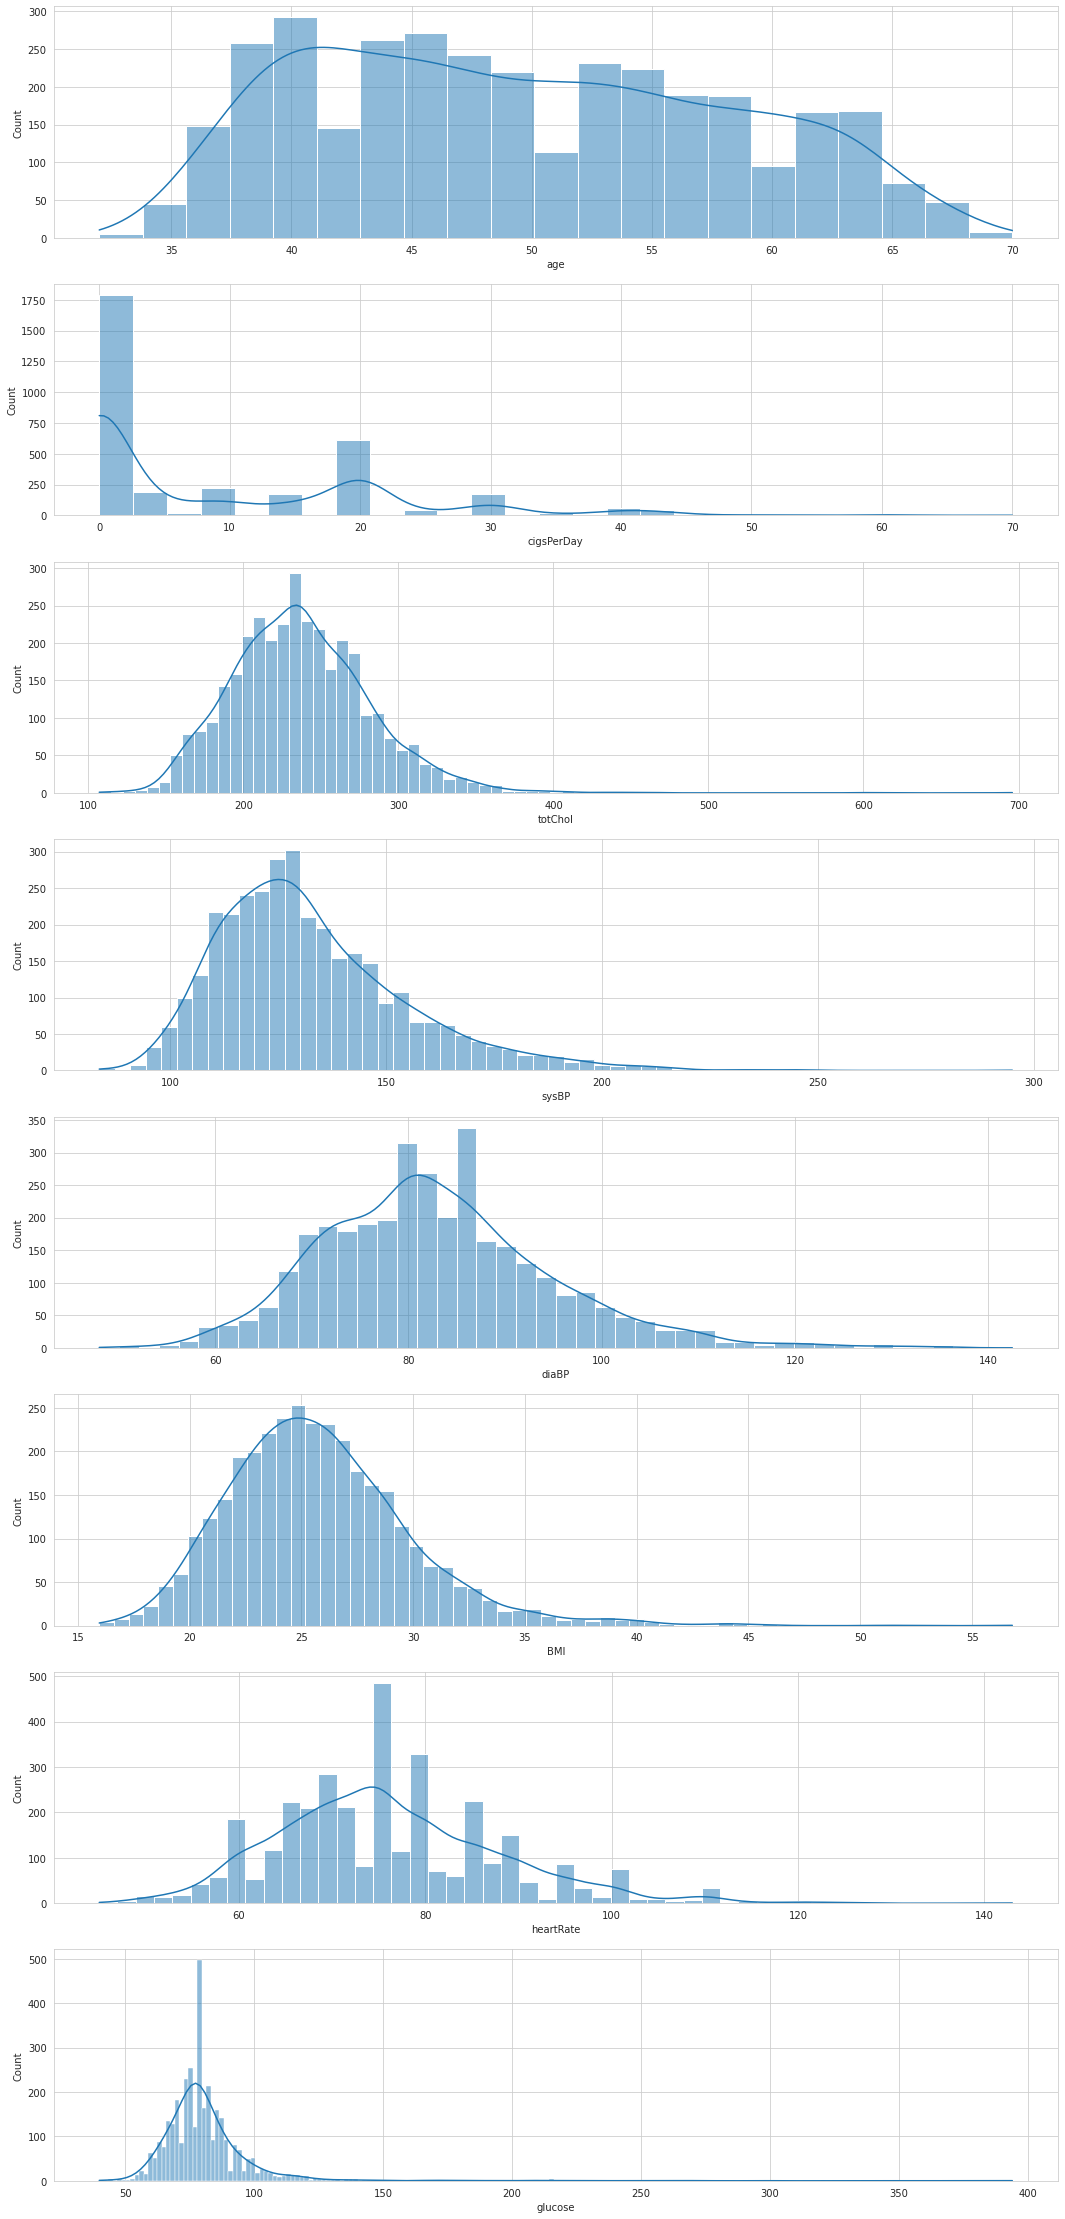

In [ ]:
# Using the function to plot graphs for numerical columns
dist_plotting(numerical_columns)

As seen from the above histograms, we can conclude that :

Age ranges from 35 years to 70 years and is almost normally distributed, with most people belonging to an age group of 40.

Cigarettes smoked per day on an average are mainly 0, but 20 cigarettes a day are also prevalent 

Cholestrol ranges form 100 to 700, with most belonging to 150 to 350.

Systolic BP ranges mainly from 100 to 200.

Diastolic BP ranges mainly from 60 to 120.

BMI ranges mainly from 16 to 40.

Heart rate ranges from 40 to 110 and most occurances are around 75.

Glucose ranges mainly from 50 to 125, rest seem like outliers with extreme numbers but cannot be ignored as these numbers can cause risk of heart disease.

We can understand from the data that, it has wide range of numbers, which indicates that both healthy and unhealthy people are considered. To get a clear understanding of risk of heart disease all these categories play an important role, especially those which are on the higher end as these extreme numbers may make a person more vulnerable to heart disease.

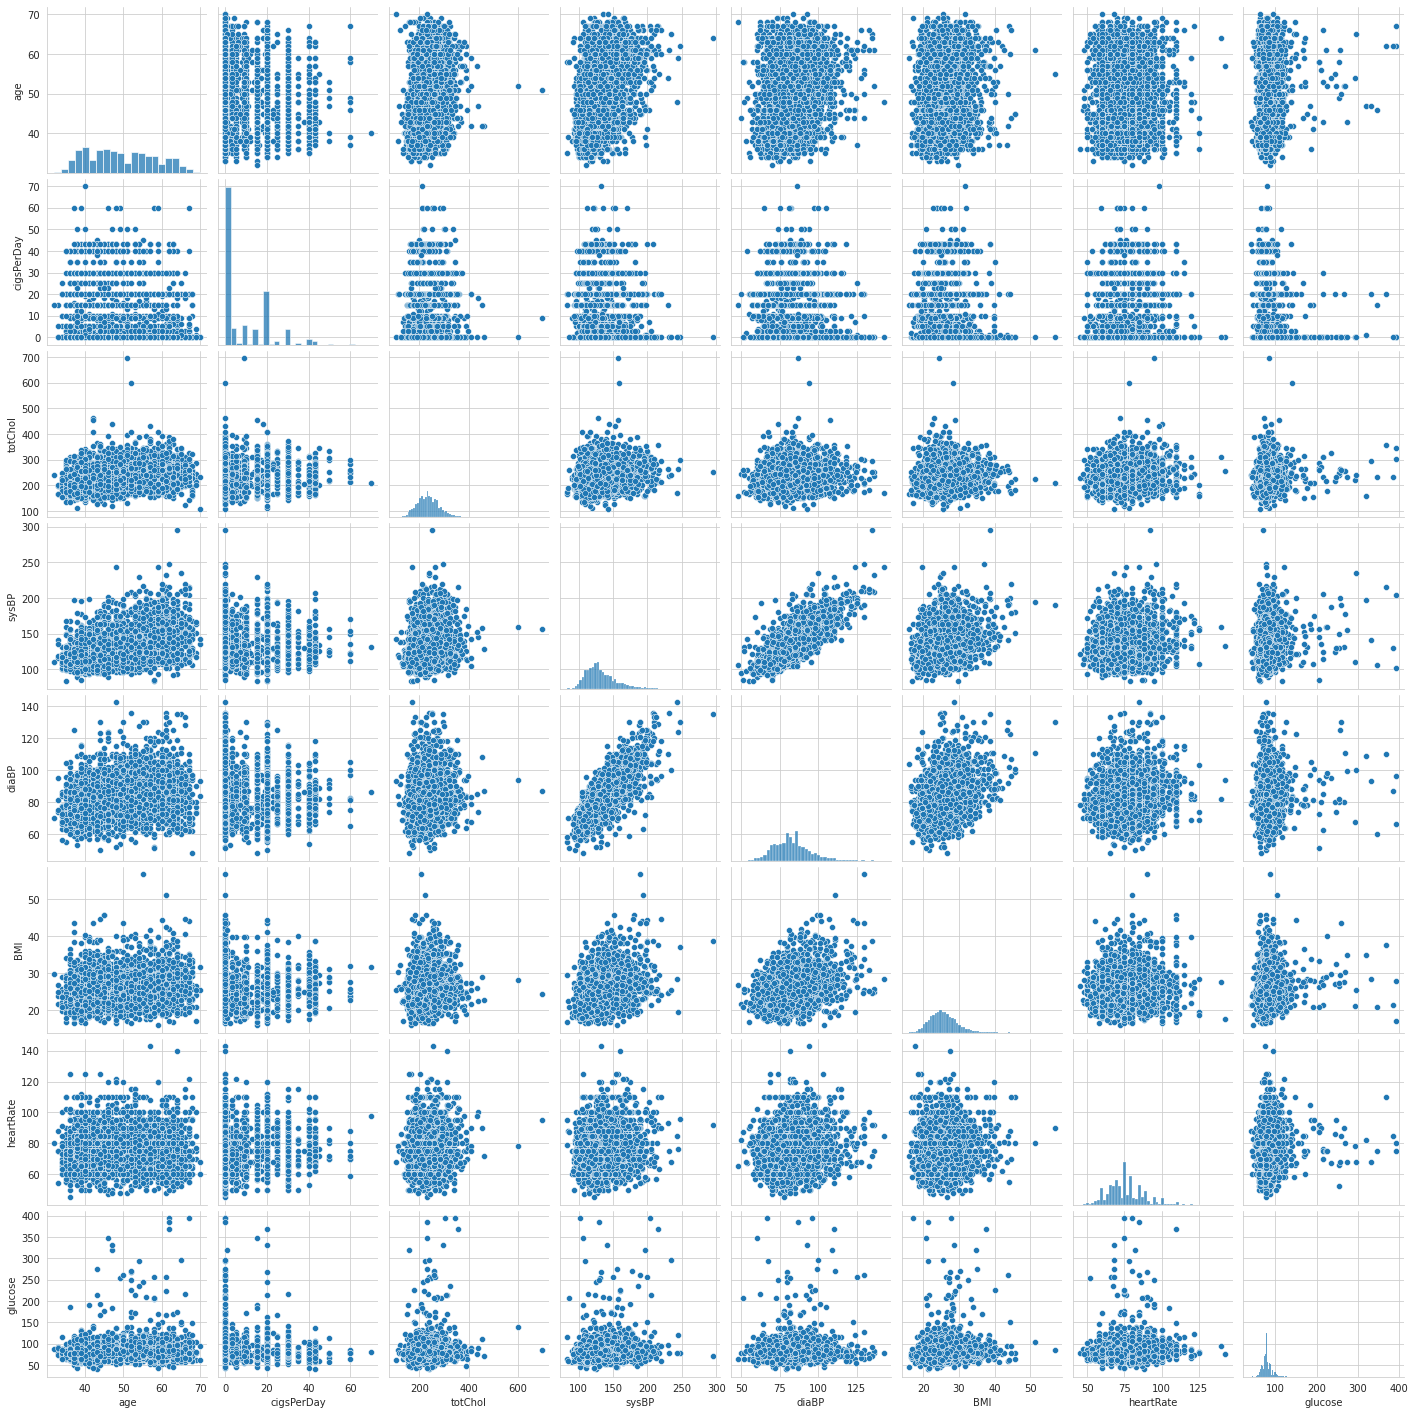

In [ ]:
# Bivariate analysis using pairplot
sns.pairplot(df_chd[numerical_columns])

*   As cholestrol is low the systolic BP also remains low.
*   Systolic BP and diastolic BP have a positive relationship.
*   Most of the cases, less cholesterol means less glucose.
*   Diastolic BP, systolic BP and BMI have a slight positive relationship.

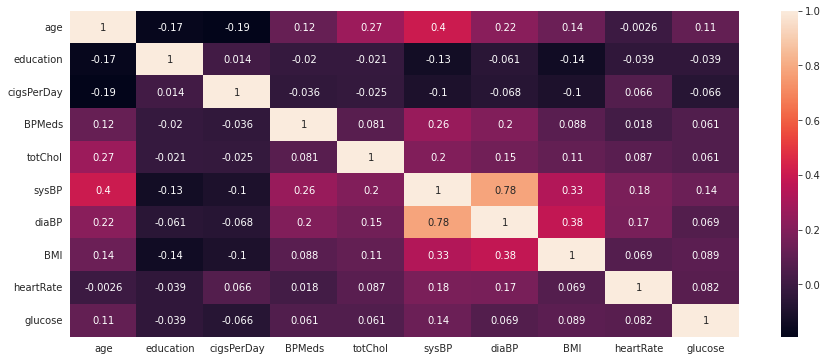

In [ ]:
# Using a heatmap to show correlation
plt.figure(figsize=(15,6))
sns.heatmap(df_chd.corr(), annot = True)

Here in categoracal variables we need to encode sex and is_smoking -encoding

In [ ]:
for x in cat_feats[:]:
 print(df_chd[x].dtype)
 

float64
object
object
float64
object
object
object
object


In [ ]:
for x in ['prevalentStroke','prevalentHyp','prevalentHyp','diabetes','TenYearCHD']:
  df_chd[x]=df_chd[x].astype("int")


In [ ]:
for x in cat_feats[:]:
 print(df_chd[x].dtype)
 

float64
object
object
float64
int64
int64
int64
int64


In [ ]:
df_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


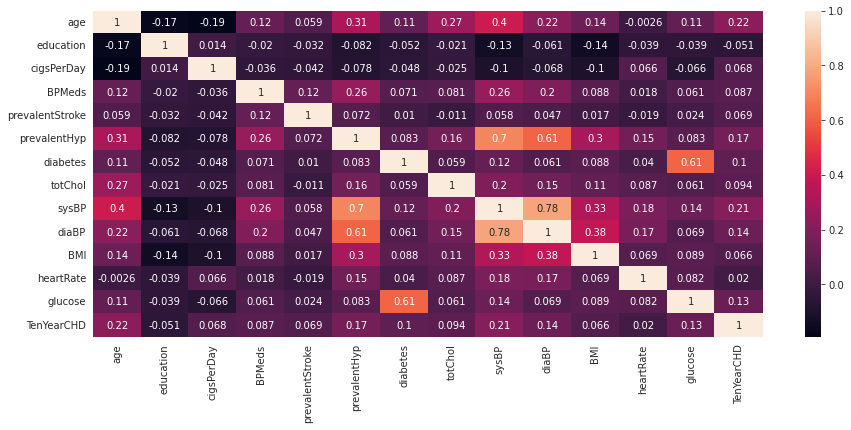

In [ ]:
# Using a heatmap to show correlation
plt.figure(figsize=(15,6))
sns.heatmap(df_chd.corr(), annot = True)

*   systolic BP and diastolic BP are positively correlated.

*   Highest correlation exists between systolic BP and diastolic BP.

*   Systolic and Diastolic BP influece hypertension and BMI.

*   Systolic BP and age have a positive correleation.

*   glucose and diabetes positively correlated.

*   Variables such as age, prevalent hypertension, systolic BP, diastolic BP, and glucose influence the risk of heart disease mainly.

*   All the variables have a positive correlation with the dependent variable, except for education, by a very small value.


###**11. Feature Engineering**

**Researching more on heart diseases, I have found that pulse pressure, which is the difference between systolic and diastolic BP has a large impact on CHD. Hence we can add PP (pulse pressure) which will carry values of both systolic and diastolic BP in one column.**

In [ ]:
# Adding pulse pressure as a column
df_chd['pulsePressure'] = df_chd['sysBP'] - df_chd['diaBP']

**As we consider the difference in systolic and diastolic BP to calculate pulse pressure, we can now drop the systolic and diastolic BP columns**

In [ ]:
# Dropping the systolic and diastolic BP columns
df_chd.drop(['sysBP','diaBP'], axis = 1, inplace = True)

**We can also drop the 'is_smoking' column, if cigarettes per day is more than 0 then the is_smoking column is 1 (YES). Hence, they both have the same meaning**.

In [ ]:
# Dropping the 'is_smoking' column
df_chd.drop('is_smoking', axis = 1, inplace = True)

**Sex is a categorical column. Hence, it can be created into a dummy variable.**

In [ ]:
df_chd.shape

(3390, 14)

In [ ]:
# Creating dummy variables for 'sex'
df_chd= pd.get_dummies(df_chd , columns = ['sex'])

In [ ]:
df_chd.shape

(3390, 15)

In [ ]:
df_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   cigsPerDay       3390 non-null   float64
 3   BPMeds           3390 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3390 non-null   float64
 8   BMI              3390 non-null   float64
 9   heartRate        3390 non-null   float64
 10  glucose          3390 non-null   float64
 11  TenYearCHD       3390 non-null   int64  
 12  pulsePressure    3390 non-null   float64
 13  sex_F            3390 non-null   uint8  
 14  sex_M            3390 non-null   uint8  
dtypes: float64(8), int64(5), uint8(2)
memory usage: 351.0 KB


In [ ]:
df_chd['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

###**12.Separating Dependent and Independent variables**

In [ ]:
#separating independent variables
X=df_chd.iloc[:,:]
X

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulsePressure,sex_F,sex_M
0,64,2.0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,63.0,1,0
1,36,4.0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,70.0,0,1
2,46,1.0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,45.0,1,0
3,50,1.0,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,70.0,0,1
4,64,1.0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,51.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,0,44.5,1,0
3386,46,1.0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,0,38.0,1,0
3387,44,3.0,3.0,0.0,0,1,0,313.0,28.92,73.0,72.0,1,59.0,0,1
3388,60,1.0,0.0,0.0,0,1,0,191.0,23.01,80.0,85.0,0,62.0,0,1


In [ ]:
X=X.drop('TenYearCHD',axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   cigsPerDay       3390 non-null   float64
 3   BPMeds           3390 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3390 non-null   float64
 8   BMI              3390 non-null   float64
 9   heartRate        3390 non-null   float64
 10  glucose          3390 non-null   float64
 11  pulsePressure    3390 non-null   float64
 12  sex_F            3390 non-null   uint8  
 13  sex_M            3390 non-null   uint8  
dtypes: float64(8), int64(4), uint8(2)
memory usage: 324.6 KB


In [ ]:
X.shape

(3390, 14)

In [ ]:
#dependent variable separation
y=df_chd['TenYearCHD']

In [ ]:
y.value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

### **13. As dependent variable class is imbalanced, need to oversample minority class.**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#smote oversampling,Creating an instance forsmote 
smote=SMOTE()

In [ ]:
#checking overall infomation like null values and datatypes
df_chd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3390 non-null   float64
 2   cigsPerDay       3390 non-null   float64
 3   BPMeds           3390 non-null   float64
 4   prevalentStroke  3390 non-null   int64  
 5   prevalentHyp     3390 non-null   int64  
 6   diabetes         3390 non-null   int64  
 7   totChol          3390 non-null   float64
 8   BMI              3390 non-null   float64
 9   heartRate        3390 non-null   float64
 10  glucose          3390 non-null   float64
 11  TenYearCHD       3390 non-null   int64  
 12  pulsePressure    3390 non-null   float64
 13  sex_F            3390 non-null   uint8  
 14  sex_M            3390 non-null   uint8  
dtypes: float64(8), int64(5), uint8(2)
memory usage: 351.0 KB


In [ ]:
#checking columns in dataset
X.columns

Index(['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulsePressure', 'sex_F', 'sex_M'],
      dtype='object')

In [ ]:
#resamping dependent and independent variables
X,y=smote.fit_resample(X,y)

In [ ]:
y.value_counts()

1    2879
0    2879
Name: TenYearCHD, dtype: int64

In [ ]:
# Rows in the dataset after oversampling
print(f'Number of rows in X is {len(X)}')
print(f'Number of rows in y is {len(y)}')

Number of rows in X is 5758
Number of rows in y is 5758


In [ ]:
#cheking dimensions of dependent variables
y.shape

(5758,)

In [ ]:
#cheking datatypes of dependent variable
y.dtype

dtype('int64')

In [ ]:
# Importing Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Creating an instance for Min Max Scaler
scaler = MinMaxScaler()

In [ ]:
# Scaling the independent variables
X = scaler.fit_transform(X)

### **14. Model Building and Evaluation**

### **Mainly 5 models will be tried and tested in this project**

### 1. Logistic Regression
### 2. Random Forest
### 3. XGB Classifier
### 4. KNN
### 5. SVM

In [ ]:
# Importing packages to split data into train and test
from sklearn.model_selection import train_test_split

In [ ]:
# Importing libraries for modelling and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# Creating a dictionary for models
models = {'Logistic Regression' : LogisticRegression(),
              'Random Forest' : RandomForestClassifier(),
              'XGB Classifier' : XGBClassifier(),
              'KNN' : KNeighborsClassifier(),
              'SVC' : SVC(probability=True)}

In [ ]:
# Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [ ]:
# Creating a function for model building
def model_build(X_train, y_train, X_test, y_test, model_dict):
  ''' Returns a dataframe with model name and accuracy scores, train confusion matrix, test confusion matrix and the values 
  for the roc curve '''
  
  # Creating a dataframe
  model_df = pd.DataFrame(columns=['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])
  
  # Creating necessary dictionaries
  train_confusion_matrix = {}  
  test_confusion_matrix = {}  
  curve = {}
  clf_report_train={}
  clf_report_test={}
  
  
  # Model building
  for n, m in model_dict.items():
    model = m
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    test_probs = model.predict_proba(X_test)
    test_probs = test_probs[:,1]

    # Evaluation
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    train_precision = precision_score(y_train, train_preds)
    test_precision = precision_score(y_test, test_preds)
    train_recall = recall_score(y_train, train_preds)
    test_recall = recall_score(y_test, test_preds)
    train_roc_auc = roc_auc_score(y_train, train_preds)
    test_roc_auc = roc_auc_score(y_test, test_preds)

    # Updating the dataframe for each iteration
    model_df = model_df.append({'Model': n,
                               'Train Accuracy' : train_accuracy,
                               'Test Accuracy': test_accuracy,
                               'Train Precision' : train_precision,
                               'Test Precision' : test_precision,
                               'Train Recall' : train_recall,
                               'Test Recall' : test_recall,
                               'Train ROC AUC' : train_roc_auc,
                               'Test ROC AUC' : test_roc_auc}, ignore_index = True)
    
    # Updating the dictionary for each iteration
    train_confusion_matrix[n] = confusion_matrix(y_train, train_preds)
    test_confusion_matrix[n] = confusion_matrix(y_test, test_preds)

    # Updating the dictionary for each iteration
    clf_report_train[n] = classification_report(y_train, train_preds)
    clf_report_test[n] = classification_report(y_test, test_preds)

    # ROC Curve values
    fpr, tpr, _ = roc_curve(y_test, test_probs)
    curve[n] = (fpr,tpr)

    

  return model_df, train_confusion_matrix, test_confusion_matrix,curve,clf_report_train,clf_report_test

In [ ]:
# Using the model function to understand the scores of different models
model_table, train_cm, test_cm, curve,clf_r_train,clf_r_test= model_build(X_train, y_train, X_test, y_test, models)

In [ ]:
# Models and their scores
model_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,Logistic Regression,0.745766,0.737847,0.778902,0.736641,0.694289,0.701818,0.746354,0.736291
1,Random Forest,1.000000,0.917535,1.000000,0.934990,1.000000,0.889091,1.000000,0.916306
2,XGB Classifier,0.885584,0.859375,0.946925,0.911017,0.819665,0.781818,0.886337,0.856025
3,KNN,0.881242,0.808160,0.849412,0.759055,0.930013,0.876364,0.880685,0.811105
4,SVC,0.783326,0.765625,0.821653,0.781124,0.729927,0.707273,0.783936,0.763105


In [ ]:
# Train clf report
for name, rep in clf_r_train.items():
  print(f'Model : {name}')
  print(rep)
  print('**'*100)

Model : Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2277
           1       0.78      0.69      0.73      2329

    accuracy                           0.75      4606
   macro avg       0.75      0.75      0.75      4606
weighted avg       0.75      0.75      0.75      4606

********************************************************************************************************************************************************************************************************
Model : Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2277
           1       1.00      1.00      1.00      2329

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

***********************************************************************************************

In [ ]:
# Train confusion matrix
for name, matrix in train_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[1818  459]
 [ 712 1617]]
********************
Model : Random Forest
[[2277    0]
 [   0 2329]]
********************
Model : XGB Classifier
[[2170  107]
 [ 420 1909]]
********************
Model : KNN
[[1893  384]
 [ 163 2166]]
********************
Model : SVC
[[1908  369]
 [ 629 1700]]
********************


In [ ]:
# Test confusion matrix
for name, matrix in test_cm.items():
  print(f'Model : {name}')
  print(matrix)
  print('**'*10)

Model : Logistic Regression
[[464 138]
 [164 386]]
********************
Model : Random Forest
[[568  34]
 [ 61 489]]
********************
Model : XGB Classifier
[[560  42]
 [120 430]]
********************
Model : KNN
[[449 153]
 [ 68 482]]
********************
Model : SVC
[[493 109]
 [161 389]]
********************


In [ ]:
# Train clf report
for name, rep in clf_r_test.items():
  print(f'Model : {name}')
  print(rep)
  print('**'*100)

Model : Logistic Regression
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       602
           1       0.74      0.70      0.72       550

    accuracy                           0.74      1152
   macro avg       0.74      0.74      0.74      1152
weighted avg       0.74      0.74      0.74      1152

********************************************************************************************************************************************************************************************************
Model : Random Forest
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       602
           1       0.93      0.89      0.91       550

    accuracy                           0.92      1152
   macro avg       0.92      0.92      0.92      1152
weighted avg       0.92      0.92      0.92      1152

***********************************************************************************************

Text(0.5, 1.0, 'ROC CURVE')

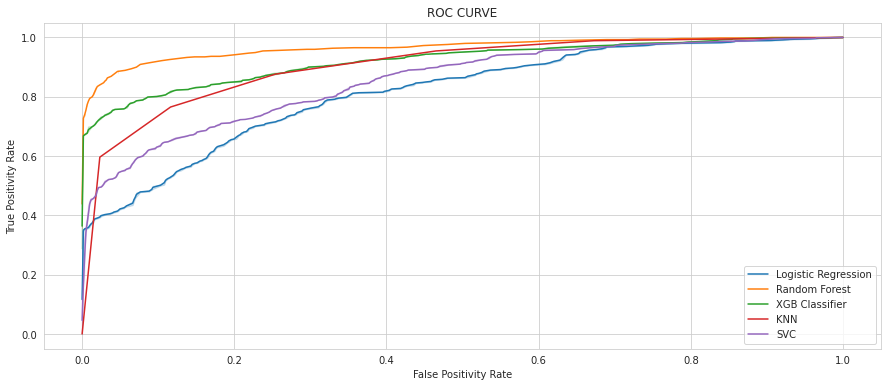

In [ ]:
# Plotting ROC Curve for all the models
plt.figure(figsize=(15,6))
for name, value in curve.items():
  sns.lineplot(x = value[0], y = value[1], label = name)
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('ROC CURVE')

###**15. Hyperparameter Tuning**

**From the model building section we can understand the best models are Random Forest and XGB Classifier. Between these two, Random Forest is overfitting to some extent compared to other models. XGB Classifier is the second best performer, hence this will be chosen for hyperparameter tuning.**

In [ ]:
# Importing libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating a function for hyperparameter tuning
def grid_fitting(name, hyperparams, estim):
  '''Returns a dataframe with scores of the model post hyperparameter tuning along with best model and confusion matrix for train and test '''
  
  grid_df = pd.DataFrame(columns = ['Model', 'Train Accuracy', 'Test Accuracy','Train Precision', 'Test Precision',
                                     'Train Recall', 'Test Recall', 'Train ROC AUC', 'Test ROC AUC'])

  grid = GridSearchCV(estimator= estim, param_grid = hyperparams, cv = 5, scoring = 'recall')

  grid.fit(X_train,y_train)

  best_model = grid.best_estimator_

  train_grid = best_model.predict(X_train)
  test_grid = best_model.predict(X_test)

  grid_train_accuracy = accuracy_score(y_train, train_grid)
  grid_test_accuracy = accuracy_score(y_test, test_grid)
  grid_train_precision = precision_score(y_train, train_grid)
  grid_test_precision = precision_score(y_test, test_grid)
  grid_train_recall = recall_score(y_train, train_grid)
  grid_test_recall = recall_score(y_test, test_grid)
  grid_train_roc_auc = roc_auc_score(y_train, train_grid)
  grid_test_roc_auc = roc_auc_score(y_test, test_grid)

  grid_df = grid_df.append({'Model': name,
                           'Train Accuracy' : grid_train_accuracy,
                           'Test Accuracy': grid_test_accuracy,
                           'Train Precision' : grid_train_precision,
                           'Test Precision' : grid_test_precision,
                           'Train Recall' : grid_train_recall,
                           'Test Recall' : grid_test_recall,
                           'Train ROC AUC' : grid_train_roc_auc,
                           'Test ROC AUC' : grid_test_roc_auc},
                           ignore_index = True)
  
  grid_train_cm = confusion_matrix(y_train, train_grid)
  grid_test_cm = confusion_matrix(y_test, test_grid)


  return best_model, grid_df, grid_train_cm, grid_test_cm

In [ ]:
# Hyperparameter dictionary
xgb_param_dict ={'n_estimators' : [300,350],
                'max_depth': [7,8,9],
                'learning_rate': [0.01, 0.001]
                 }

In [ ]:
# Apply the function to tune the parameters
xgb_best_model, xgb_df, xgb_grid_train_cm, xgb_grid_test_cm = grid_fitting('XGB', xgb_param_dict, XGBClassifier())

In [ ]:
# The best estimators of the model
xgb_best_model

XGBClassifier(learning_rate=0.01, max_depth=9, n_estimators=350)

In [ ]:
# Dataframe showing scores of the model after hyperparameter tuning
xgb_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train ROC AUC,Test ROC AUC
0,XGB,0.964828,0.883681,0.984354,0.903101,0.94547,0.847273,0.96505,0.882108


In [ ]:
# Confusion matrix of training data after hyperparameter tuning
xgb_grid_train_cm

array([[2242,   35],
       [ 127, 2202]])

In [ ]:
# Confusion matrix of test data after hyperparameter tuning
xgb_grid_test_cm

array([[552,  50],
       [ 84, 466]])

### As we can see the hyperparameter tuning has improved the model from the base XGBoost Classifier especially for recall, the parameter we are focusing on.

### **16. SHAP will help increase model explainability and enchance our predictions**

In [ ]:
# Install shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.1 MB/s 


In [ ]:
# Importing SHAP
import shap

In [ ]:
# Creating instances of shap
explainer = shap.TreeExplainer(xgb_best_model)
shap_values = explainer.shap_values(X_test)

In [ ]:
# As X_test is an array without column names we will build a dataframe
shap_df = pd.DataFrame(X_test, columns = ['age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulsePressure', 'sex_F', 'sex_M'])

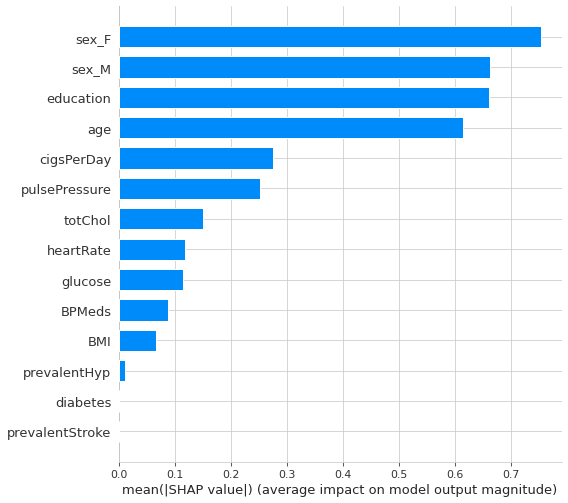

In [ ]:
# SHAP Summary Plot
shap.summary_plot(shap_values, shap_df, plot_type = 'bar')

### **17. Summary and Conclusions**